In [136]:
import random
import matplotlib.pyplot as plt

In [137]:
class Station:
    def __init__(self):
        self.current_frame_remaining_time = 0
        self.delay = 0
        self.buff_size = 0

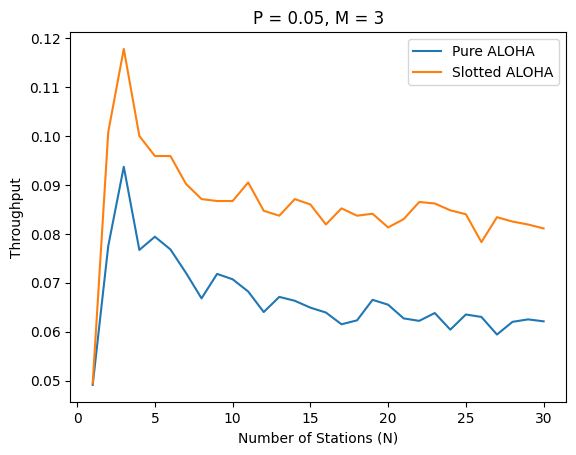

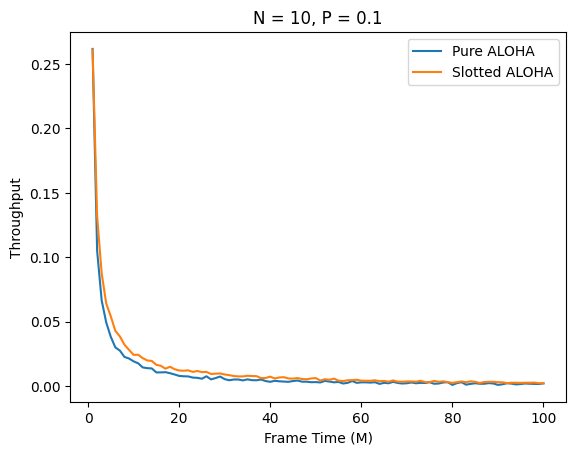

In [138]:
def pure_aloha_simulation(N, P, M, T):
    # the first element is the slots remaining for the current frame
    # the second element is the delay before we can transmit again
    # the third element is the number of frames in the buffer
    stations = [Station() for i in range(N)]
    successful_transmissions = 0

    for t in range(T):
        # generate new packets at each station with probability P
        # if a station has no frame in the buffer, start a new frame
        for i in range(N):
            if random.random() < P:
                # if the station has no frame in the buffer, start a new frame with M slots remaining
                if stations[i].buff_size == 0:
                    stations[i].current_frame_remaining_time = M
                stations[i].buff_size += 1
        
        # count the number of stations transmitting
        transmitting_stations = sum(1 for s in stations if s.current_frame_remaining_time > 0 and s.delay == 0)
        if transmitting_stations > 1:
            for i in range(N):
                if stations[i].current_frame_remaining_time > 0 and stations[i].delay == 0:
                    stations[i].current_frame_remaining_time = M
                    stations[i].delay = random.randint(1,M*N)

        # decrement frame transmission schedule for each station
        for i in range(N):
            # if the station is transmitting, decrement the remaining time
            if stations[i].current_frame_remaining_time > 0 and stations[i].delay == 0:
                stations[i].current_frame_remaining_time -= 1
                # if the frame has been transmitted, remove it from the buffer and increment the successful transmissions
                if stations[i].current_frame_remaining_time == 0:
                    successful_transmissions += 1
                    stations[i].buff_size -= 1
                    # if there are more frames in the buffer, start transmitting the next one
                    if stations[i].buff_size > 0:
                        stations[i].current_frame_remaining_time = M
            if stations[i].delay > 0:
                stations[i].delay -= 1

    return successful_transmissions / T

def slotted_aloha_simulation(N, P, M, T):
    stations = [Station() for i in range(N)]
    successful_transmissions = 0

    for t in range(T):
        # decrement delay for each station

        # generate new packets at each station with probability P
        # if a station has no frame in the buffer, start a new frame
        for i in range(N):
            if random.random() < P:
                if stations[i].buff_size == 0:
                    stations[i].current_frame_remaining_time = M
                stations[i].buff_size += 1

        if t % M == 0:
            # count the number of stations transmitting
            transmitting_stations = sum(1 for s in stations if s.current_frame_remaining_time > 0 and s.delay == 0)
            # if more than one station is transmitting, reset the frame transmission schedule for all stations
            if transmitting_stations > 1:
                for i in range(N):
                    if stations[i].current_frame_remaining_time > 0 and stations[i].delay == 0:
                        stations[i].current_frame_remaining_time = M
                        stations[i].delay = random.randint(1, N) * M

            if transmitting_stations == 1:
                successful_transmissions += 1
                for i in range(N):
                    if stations[i].current_frame_remaining_time > 0 and stations[i].delay == 0:
                        stations[i].buff_size -= 1
                        if stations[i].buff_size > 0:
                            stations[i].current_frame_remaining_time = M
                        else:
                            stations[i].current_frame_remaining_time = 0


        for i in range(N):
            if stations[i].delay > 0:
                stations[i].delay -= 1

    return successful_transmissions / T

def plot_throughput_vs_stations():
    P = 0.05
    M = 3
    # P = 0.1
    # M = 10
    T = 10000
    max_stations = 30

    pure_aloha_throughput = [pure_aloha_simulation(N, P, M, T) for N in range(1, max_stations + 1)]
    slotted_aloha_throughput = [slotted_aloha_simulation(N, P, M, T) for N in range(1, max_stations + 1)]

    plt.plot(range(1, max_stations + 1), pure_aloha_throughput, label='Pure ALOHA')
    plt.plot(range(1, max_stations + 1), slotted_aloha_throughput, label='Slotted ALOHA')
    plt.title('P = ' + str(P) + ', M = ' + str(M))
    plt.xlabel('Number of Stations (N)')
    plt.ylabel('Throughput')
    plt.legend()
    plt.show()

def plot_throughput_vs_frame_time():
    N = 10
    P = 0.1
    T = 10000
    max_frame_time = 100

    pure_aloha_throughput = [pure_aloha_simulation(N, P, M, T) for M in range(1, max_frame_time + 1)]
    slotted_aloha_throughput = [slotted_aloha_simulation(N, P, M, T) for M in range(1, max_frame_time + 1)]

    plt.plot(range(1, max_frame_time + 1), pure_aloha_throughput, label='Pure ALOHA')
    plt.plot(range(1, max_frame_time + 1), slotted_aloha_throughput, label='Slotted ALOHA')
    plt.title('N = ' + str(N) + ', P = ' + str(P))
    plt.xlabel('Frame Time (M)')
    plt.ylabel('Throughput')
    plt.legend()
    plt.show()
plot_throughput_vs_stations()
plot_throughput_vs_frame_time()